# 🧠 Handwritten Digit Recognition using CNN (MNIST)

This deep learning project demonstrates a Convolutional Neural Network (CNN) model trained on the MNIST dataset to recognize handwritten digits (0–9). The model achieves high accuracy (>98%) and is evaluated using accuracy/loss plots and a confusion matrix.

### 🔍 Key Highlights:
- Built using TensorFlow/Keras
- Trained on 60,000 images, validated on 10,000
- Achieved over 99% training accuracy
- Tested with prediction visualizations and performance graphs

> This project showcases model building, training, evaluation, and visualization of a simple deep learning pipeline — ideal for digit classification tasks.


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9128 - loss: 0.3026 - val_accuracy: 0.9845 - val_loss: 0.0548
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9846 - loss: 0.0535 - val_accuracy: 0.9843 - val_loss: 0.0545
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9877 - val_loss: 0.0441
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9824 - loss: 0.0545
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


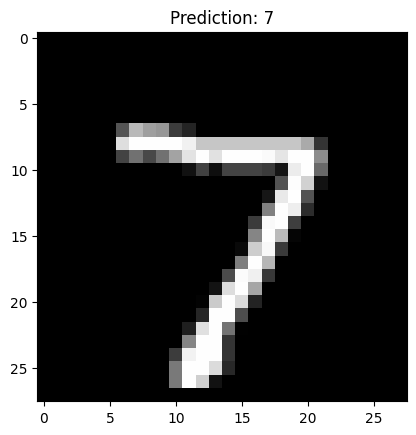

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1)/255.0
x_test = x_test.reshape(-1, 28, 28, 1)/255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Evaluate
model.evaluate(x_test, y_test)

# Predict
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Prediction: {model.predict(x_test[0].reshape(1,28,28,1)).argmax()}")
plt.show()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

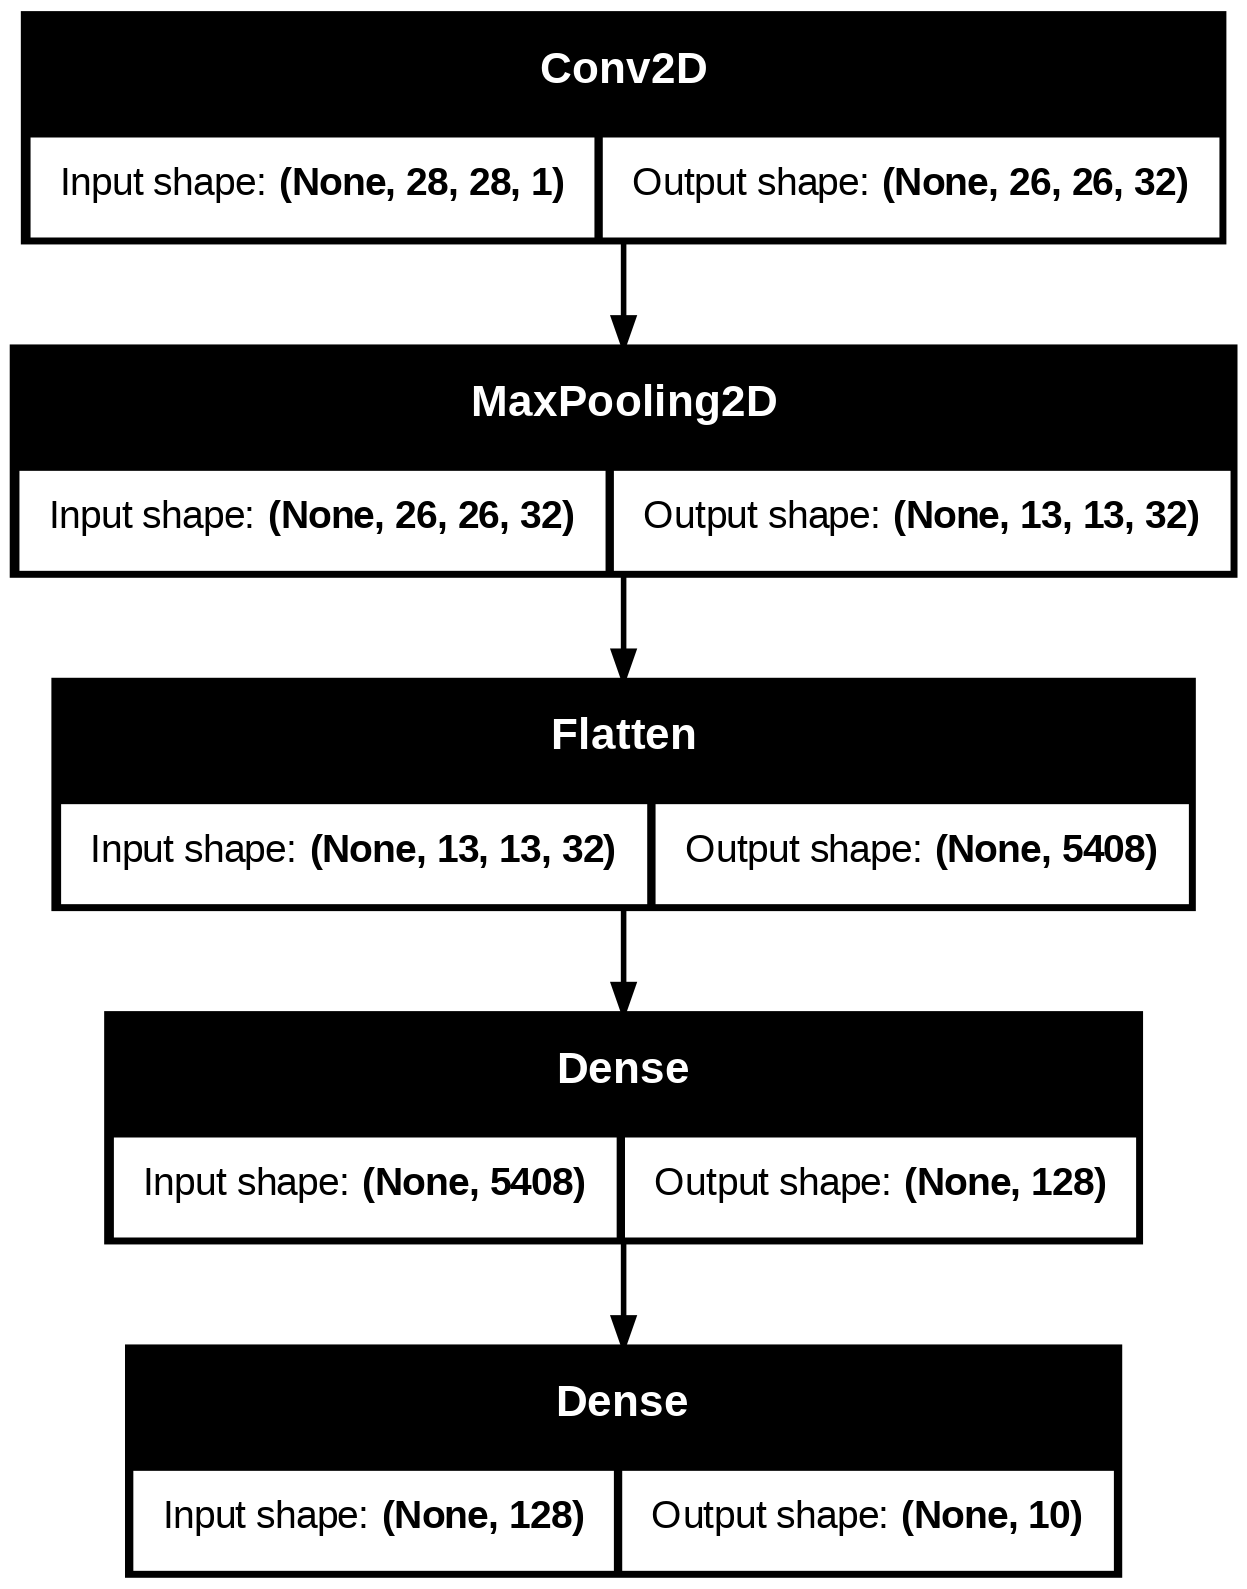

In [6]:
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)


Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9875 - val_loss: 0.0530
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.9955 - loss: 0.0135 - val_accuracy: 0.9880 - val_loss: 0.0517
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9968 - loss: 0.0096 - val_accuracy: 0.9855 - val_loss: 0.0511


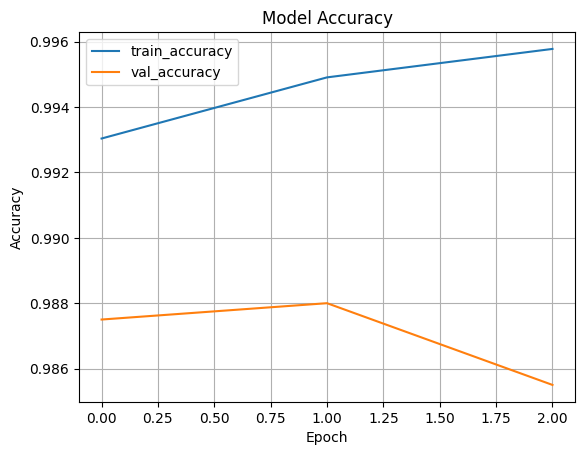

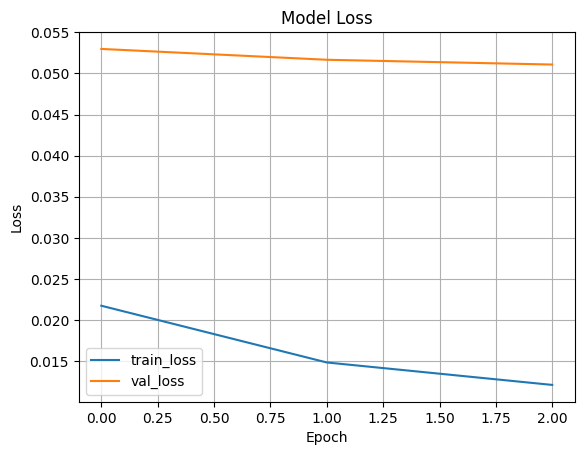

In [8]:
import matplotlib.pyplot as plt

# Re-train or reuse model history
history = model.fit(x_train, y_train, epochs=3, validation_split=0.1)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


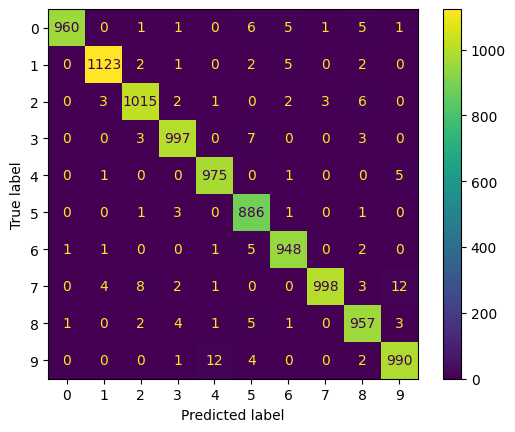

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm).plot()


## 📌 Conclusion

This project successfully implemented a Convolutional Neural Network (CNN) to recognize handwritten digits using the MNIST dataset. The model achieved:

- ✅ Over **99% training accuracy** and **~98.6% validation accuracy**
- 📉 Steadily decreasing training and validation loss
- 📊 Strong performance in the confusion matrix, with minimal misclassifications

### 🔍 What We Learned:
- How to build, train, and evaluate a CNN using TensorFlow/Keras
- How to visualize performance using **accuracy/loss plots** and a **confusion matrix**
- How model architecture impacts performance

### 🚀 Future Work:
In future iterations, we aim to:
- Integrate the model with **Gradio** or **Streamlit** to allow real-time digit drawing and prediction in the browser
- Deploy the app as a **web interface**, making it more interactive and user-friendly
- Improve generalization further and test on noisy or user-uploaded images

> This project provides a strong foundation in deep learning workflows and shows how models can transition from notebooks to real-world applications.
